In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt
import os
import glob
from pandas import DataFrame

In [25]:
#폴더명 입력해주기
youtube_channel = input("유투브 채널 이름 입력하시오.")
path =  str(youtube_channel) + "/comment"
path2 = str(youtube_channel) + '\\result.csv'
arg_youtube = str(youtube_channel) + "*"


allFile_list = glob.glob(os.path.join(path,arg_youtube))
print(allFile_list)
allData = []
for file in allFile_list:
    df = pd.read_csv(file)
    allData.append(df)
    
dataCombine = pd.concat(allData,axis =0, ignore_index = True)

dataCombine.to_csv(path2, index = False)



유투브 채널 이름 입력하시오.아름송이
['아름송이/comment\\아름송이_comment_1.csv', '아름송이/comment\\아름송이_comment_10.csv', '아름송이/comment\\아름송이_comment_11.csv', '아름송이/comment\\아름송이_comment_12.csv', '아름송이/comment\\아름송이_comment_13.csv', '아름송이/comment\\아름송이_comment_14.csv', '아름송이/comment\\아름송이_comment_15.csv', '아름송이/comment\\아름송이_comment_16.csv', '아름송이/comment\\아름송이_comment_17.csv', '아름송이/comment\\아름송이_comment_18.csv', '아름송이/comment\\아름송이_comment_19.csv', '아름송이/comment\\아름송이_comment_2.csv', '아름송이/comment\\아름송이_comment_20.csv', '아름송이/comment\\아름송이_comment_3.csv', '아름송이/comment\\아름송이_comment_4.csv', '아름송이/comment\\아름송이_comment_5.csv', '아름송이/comment\\아름송이_comment_6.csv', '아름송이/comment\\아름송이_comment_7.csv', '아름송이/comment\\아름송이_comment_8.csv', '아름송이/comment\\아름송이_comment_9.csv']


In [26]:
cdPath = str(youtube_channel) + '/result.csv'
comment_data = pd.read_csv(cdPath)

In [27]:
comment_data


,Unnamed: 0,youtube_id,comment,like_num
0,0,areumsongee아름송이,"매그넘 루비는 CU, GS25, 마켓컬리에서 구매 할 수 있어요!!\n렌즈는 렌시스...",23개
1,1,XIANC,I honestly can't understand how someone can be...,6개
2,2,Twaddlex,*당신은 너무 귀엽고 아름답습니다*🤍🤍,9개
3,3,risam,いつもメイク動画楽しく見させてもらっていて、ほんとにソンイちゃんはいつ見ても綺麗で同じ女性と...,19개
4,4,tasiyuso,ソンイちゃんのメイクとか参考にさせていただいてます！ほんと可愛くて大好きです！日本から応援さ...,9개
...,...,...,...,...
2997,155,처럼영미,언니 사랑해,0개
2998,156,팔보채냐보채지좀마,진짜 언니 영상볼때마다 대리만족되요💓💓,0개
2999,157,NaN,희망 일본어 자막!,0개
3000,158,Young,사람이 너무 착하다👍,0개


In [29]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [30]:
comment_list = []
for i in range(len(comment_data)):
    comment_list.append(comment_data['comment'].iloc[i])

In [31]:
comment_result = []

for i in comment_list:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

In [32]:
comment_result

,comment
0,매그넘 루비는 CU GS25 마켓컬리에서 구매 할 수 있어요렌즈는 렌시스 신디 그레...
1,I honestly can't understand how someone can be...
2,*당신은 너무 귀엽고 아름답습니다*🤍🤍
3,いつもメイク動画楽しく見させてもらっていて、ほんとにソンイちゃんはいつ見ても綺麗で同じ女性と...
4,ソンイちゃんのメイクとか参考にさせていただいてます！ほんと可愛くて大好きです！日本から応援さ...
...,...
2997,언니 사랑해
2998,진짜 언니 영상볼때마다 대리만족되요
2999,희망 일본어 자막
3000,사람이 너무 착하다


In [33]:

#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

In [34]:
from konlpy.tag import Twitter

def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    s
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

C:\Users\acorn\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [35]:
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

In [36]:
comment_result

,comment,token
0,매그넘 루비는 CU GS25 마켓컬리에서 구매 할 수 있어요렌즈는 렌시스 신디 그레...,"[매그넘, 루비, 마켓, 컬리, 구매, 수, 렌즈, 렌, 시스, 그레이, 린지, 참..."
1,I honestly can't understand how someone can be...,[]
2,*당신은 너무 귀엽고 아름답습니다*🤍🤍,[당신]
3,いつもメイク動画楽しく見させてもらっていて、ほんとにソンイちゃんはいつ見ても綺麗で同じ女性と...,[]
4,ソンイちゃんのメイクとか参考にさせていただいてます！ほんと可愛くて大好きです！日本から応援さ...,[사랑]
...,...,...
2997,언니 사랑해,"[언니, 사랑]"
2998,진짜 언니 영상볼때마다 대리만족되요,"[진짜, 언니, 영상, 볼때, 대리, 만족]"
2999,희망 일본어 자막,"[희망, 일본어, 자막]"
3000,사람이 너무 착하다,[사람]


In [37]:
pd_Path = str(youtube_channel) +'/token_result.csv'
comment_result.to_csv(pd_Path, index = False)

In [38]:
pd_testPath = str(youtube_channel) +'/token_result.csv'
pdtest = pd.read_csv(pd_testPath)

In [39]:
pdtest

,comment,token
0,매그넘 루비는 CU GS25 마켓컬리에서 구매 할 수 있어요렌즈는 렌시스 신디 그레...,"['매그넘', '루비', '마켓', '컬리', '구매', '수', '렌즈', '렌'..."
1,I honestly can't understand how someone can be...,[]
2,*당신은 너무 귀엽고 아름답습니다*🤍🤍,['당신']
3,いつもメイク動画楽しく見させてもらっていて、ほんとにソンイちゃんはいつ見ても綺麗で同じ女性と...,[]
4,ソンイちゃんのメイクとか参考にさせていただいてます！ほんと可愛くて大好きです！日本から応援さ...,['사랑']
...,...,...
2997,언니 사랑해,"['언니', '사랑']"
2998,진짜 언니 영상볼때마다 대리만족되요,"['진짜', '언니', '영상', '볼때', '대리', '만족']"
2999,희망 일본어 자막,"['희망', '일본어', '자막']"
3000,사람이 너무 착하다,['사람']


In [40]:
from collections import Counter
from wordcloud import WordCloud
#import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

In [41]:
noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])

In [42]:
counts = Counter(noun_list)
tags = counts.most_common(30)

In [43]:
#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

C:\Users\acorn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acorn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acorn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acorn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acorn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\acorn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from c

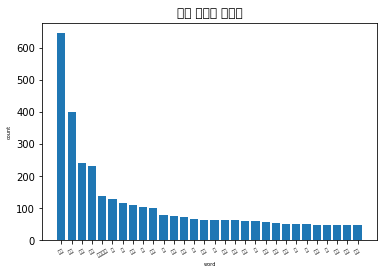

In [44]:
index = np.arange(len(test))
plt.bar(index,test['count'].tolist() )
plt.xlabel('word', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt.title('단어 빈도수 시각화')
plt.show()

{'언니': 646, '진짜': 400, '영상': 242, '송이': 233, '메이크업': 138, '때': 129, '저': 117, '아름': 112, '거': 104, '오늘': 101, '이': 80, '사랑': 75, '화장': 72, '더': 68, '보고': 64, '왜': 64, '정보': 63, '항상': 63, '흑발': 62, '것': 61, '커플': 59, '머리': 55, '얼굴': 52, '엘': 51, '용': 50, '완전': 49, '분': 49, '브이': 49, '로그': 48, '이번': 47}


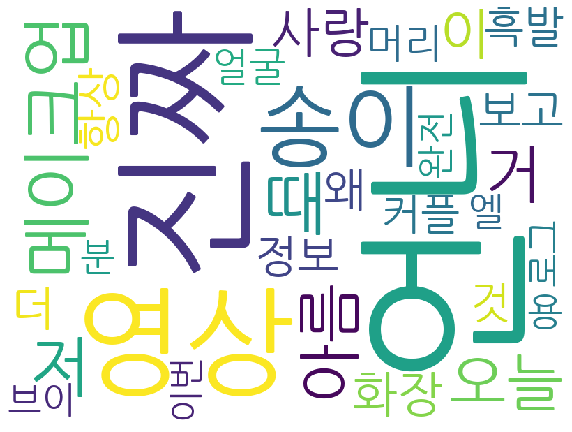

In [45]:
wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=800, height=600)

print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()